In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shakespeare_functions as sf
import shakespeare_dicts as sd

from importlib import reload

import re
import nltk
from nltk import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk import RegexpTokenizer

from autocorrect import spell

import spacy
import en_core_web_sm

In [2]:
line_df = pd.read_csv('../data/csv/ShakespeareCharacterLines_engineered.csv', index_col = ['play', 'name', 'line_number'])

In [3]:
char_df = pd.read_csv('../data/csv/ShakespeareCharacterLines_character_corpus.csv', index_col = ['play', 'name'])

In [ ]:
colon = slice(None)

- Number of character deaths.

In [61]:
char_df['character']

131

- Check distribution of character maximum lines.

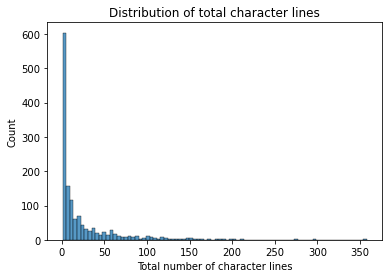

In [66]:
line_counts = {}
for index in line_df.index:
    play  = index[0]
    name = index[1]
    
    if (play, name) not in line_counts:
        line_counts[(play, name)] = line_df.loc[(play, name, colon), 'max_line_count'][0]

sns.histplot(line_counts)
plt.xlabel('Total number of character lines')
plt.title("Distribution of total character lines")
plt.show()

- Distribution of total character counts.

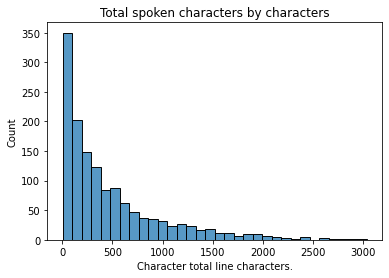

In [67]:
character_counts = {}
for index in line_df.index:
    play  = index[0]
    name = index[1]
    
    if (play, name) not in character_counts:
        character_counts[(play, name)] = line_df.loc[(play, name, colon), 'total_character_count'][0]

sns.histplot(character_counts)
plt.xlabel("Character total line characters.")
plt.title("Total spoken characters by characters")
plt.show()

- Characters with the most speaking lines.

In [68]:
temp = []
[temp.append(name) for name in line_df.sort_values(by = 'max_line_count').index.get_level_values(1) if name not in temp]
temp[-5:]

['CLEOPATRA', 'TIMON', 'IAGO', 'OTHELLO', 'HAMLET']

- Characters with the longest dialogue overall.

In [69]:
temp = []
[temp.append(name) for name in line_df.sort_values(by = 'total_character_count').index.get_level_values(1) if name not in temp]
temp[-5:]

['HAMLET', 'ULYSSES', 'EGEON', 'BISHOP OF CANTERBURY', 'PALAMON']